<h1>1. Problem Statement </h1>
Use basics understanding of <b>Pandas,matplotlib and Seaborn</b> and the basic commands of (EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
<ol>
    <li>Exploratory Data Analysis on <b>New Car Sales</b> data Analyzing the car sales data with :</li>
    <li>Finding patterns in Data </li>
    <li>Determining relationships in Data </li>
    <li>Checking of assumptions </li>

</ol>

<h1> 2. Description of the dataset </h1>

<li>The dataset consists of the information about different car sales in over a period of time. Various variables present in the dataset includes data of car, model, price, drive etc.</li>
<li>The dataset comprises of 9576 observations of 10 columns. Below is a table showing names of all the columns and their description.</li>
<table>
<thead>
    <style>
td {
  text-align: center;
}
</style>
<tr>
<th>Column Name</th>
<th>Description</th>
</tr>
</thead>
<tbody><tr>
<td>car</td>
<td>Manufacturer brand</td>
</tr>
<tr>
<td>price</td>
<td>Seller’s price in advertisement (in USD)</td>
</tr>
<tr>
<td>body</td>
<td>Car body type</td>
</tr>
<tr>
<td>mileage</td>
<td>as mentioned in advertisement (‘000 Km)</td>
</tr>
<tr>
<td>engV</td>
<td>rounded engine volume (‘000 cubic cm)</td>
</tr>
<tr>
<td>engType</td>
<td>type of fuel (“Other” in this case should be treated as NA)</td>
</tr>
<tr>
<td>registration</td>
<td>whether car registered in Ukraine or not</td>
</tr>
<tr>
<td>year</td>
<td>year of production</td>
</tr>
<tr>
<td>model</td>
<td>specific model name</td>
</tr>
<tr>
<td>drive</td>
<td>drive type</td>
</tr>
</tbody></table>
 	



<b>2.1  Import Packages</b>

In [5]:
import numpy as np
np.set_printoptions(precision=4)                   

import pandas as pd
pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', -1)         
pd.options.display.max_columns = 50                

import matplotlib.pyplot as plt
            
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)     

import warnings
warnings.filterwarnings('ignore') 

D:\Study\Data-Science\Software\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [6]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in d:\study\data-science\software\lib\site-packages (4.13.0)


<b> 2.2 Import Dataset</b>

In [7]:
car_sales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252') 
car_sales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [11]:
car_sales_data.shape

(9576, 10)

In [4]:
car_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [5]:
car_sales_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [12]:
car_sales_data.isnull().sum()

car             0  
price           0  
body            0  
mileage         0  
engV            434
engType         0  
registration    0  
year            0  
model           0  
drive           511
dtype: int64

In [6]:
car_sales_data[car_sales_data['price'] == 0.000000].count()

car             267
price           267
body            267
mileage         267
engV            258
engType         267
registration    267
year            267
model           267
drive           248
dtype: int64

In [7]:
car_sales_data.isnull().sum()

car             0  
price           0  
body            0  
mileage         0  
engV            434
engType         0  
registration    0  
year            0  
model           0  
drive           511
dtype: int64

<h1>3. Profiling</h1>

In [8]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(car_sales_data,minimal=True)

In [ ]:
profile.to_file("carsales_pre_profiling.html")

After Preprocessing of profiles in <b>carsales_pre_profiling.html</b> We have below Observations :   
<ul>
    <li><b>engtype </b> has other values which should be changed to <b>NAN</b> </li>
    <li><b>Price</b> has <b>267 </b> zeros ,change it to <b>NAN</b></li>
    <li><b>Mileage</b> has <b>348</b> zeros ,change it to <b>NAN</b></li>


In [8]:
car_sales_data.replace({'engType':'other','price':0,'mileage':0},np.nan,inplace=True)

In [13]:
profile = pandas_profiling.ProfileReport(car_sales_data)
profile.to_file(outputfile="carsale_before_preprocessing_2.html")

TypeError: to_file() got an unexpected keyword argument 'outputfile'

In [14]:
profile.to_file("carsales_pre_profiling2.html")

In [8]:
car_sales_data[car_sales_data['price'] == 0.000000].count()


car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [8]:
car_sales_data.isnull().sum()

car             0  
price           267
body            0  
mileage         348
engV            434
engType         0  
registration    0  
year            0  
model           0  
drive           511
dtype: int64

 <h1>4. Pre-Procesing of Data<h1> 

<b>4.1 Remove Duplicates <b>

In [9]:
car_sales_data.drop_duplicates(inplace=True) #inplace used to modify the dataset with applied command
car_sales_data.shape

(9463, 10)

In [10]:
car_sales_data.isnull().sum()

car             0  
price           240
body            0  
mileage         310
engV            434
engType         0  
registration    0  
year            0  
model           0  
drive           510
dtype: int64

Column **price** has **348** misssing which will be replaced by Median

In [30]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif car_sales_data.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = car_sales_data.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'price' feature. 
        return car_sales_data['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = car_sales_data.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
print(type(price_median))
price_median.head(20)

<class 'pandas.core.frame.DataFrame'>


,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0
5,Alfa Romeo,147,5900.0
6,Alfa Romeo,156,2325.0
7,Alfa Romeo,159,12050.0
8,Alfa Romeo,33,1800.0
9,Alfa Romeo,75,2300.0


In [31]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
car_sales_data['price'] = car_sales_data.apply(fill_with_median, axis=1)
car_sales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Other,yes,2013,E-Class,rear


**mileage** column has **348** missing values . We will replace them with median values .  

In [12]:
def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif car_sales_data.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = car_sales_data.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return car_sales_data['mileage'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median = car_sales_data.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
mileage_median.head()

,car,model,mileage_med
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [13]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
car_sales_data['mileage'] = car_sales_data.apply(fill_with_median, axis=1)
car_sales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,Other,yes,2013,E-Class,NaN


In [14]:
car_sales_data[car_sales_data['price'] == 0.000000].count()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [31]:
car_sales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

**engv** column has **434** missing values . We will replace them with the median values 

In [15]:
def get_median_engV(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif car_sales_data.groupby(['car'])['engV'].count()[brand] > 0:
        brand_median = car_sales_data.groupby(['car'])['engV'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return car_sales_data['engV'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = car_sales_data.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV': 'engV_med'}, inplace=True)
engV_median.head()

,car,model,engV_med
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [16]:
def fill_with_median(x):
    if pd.isnull(x['engV']):
        return engV_median[(engV_median['car'] == x['car']) & (engV_median['model'] == x['model'])]['engV_med'].values[0]
    else:
        return x['engV']
    
car_sales_data['engV'] = car_sales_data.apply(fill_with_median, axis=1)
car_sales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Other,yes,2013,E-Class,NaN


In [19]:
car_sales_data.isnull().sum()

car             0  
price           0  
body            0  
mileage         0  
engV            434
engType         0  
registration    0  
year            0  
model           0  
drive           0  
dtype: int64

In [20]:
car_sales_data.describe()

,price,mileage,engV,year
count,9463.000000,9153.000000,9463.000000,9463.000000
mean,16080.116288,144.663717,2.622469,2006.525837
std,24127.131261,96.635017,5.999659,7.062584
min,259.350000,1.000000,0.100000,1953.000000
25%,5494.500000,77.000000,1.600000,2004.000000
50%,9500.000000,131.000000,2.000000,2008.000000
75%,17000.000000,198.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


We have **510** missing data for **drive** column and drive is a **categorical** data . We will replace the data with **mode**

In [17]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif car_sales_data.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = car_sales_data.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'drive' feature. 
        return car_sales_data['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = car_sales_data.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [18]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
car_sales_data['drive'] = car_sales_data.apply(fill_with_mode, axis=1)
car_sales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Other,yes,2013,E-Class,rear


We have **462** missing data for **engType** column and drive is a **categorical** data . We will replace the data with **mode**

In [19]:
def get_engType_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif car_sales_data.groupby(['car'])['engType'].count()[brand] > 0:
        brand_mode = car_sales_data.groupby(['car'])['engType'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'engType' feature. 
        return car_sales_data['engType'].mode() # Otherwise return dataset's mode for the 'engType' feature.
    
engType_modes = car_sales_data.groupby(['car','model'])['engType'].apply(get_engType_mode).reset_index().drop('level_2', axis=1)
engType_modes.rename(columns={'engType': 'engType_mode'}, inplace=True)
engType_modes.head()

,car,model,engType_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas
2,Acura,TL,Gas
3,Acura,TLX,Petrol
4,Acura,ZDX,Other


In [20]:
def fill_with_mode(x):
    if pd.isnull(x['engType']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engType']
    
car_sales_data['engType'] = car_sales_data.apply(fill_with_mode, axis=1)
car_sales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,2.6,Other,yes,2013,E-Class,rear


In [23]:
car_sales_data.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

<h1>5. Post Profiling Using Pandas </h1> 

In [35]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(car_sales_data,minimal=True)

In [36]:
profile.to_file("carsales_post_profiling.html")

Now if we compare the **carsales_pre_profiling2.html** and **carsales_post_profiling.html** , we have the below observation
<ul>
    <li> Duplicate rows : <b>0</b> </li>
    <li> Missing data : <b>0</b></li>
    <li> No of Observations : <b>9463</b> </li>
</ul>

 <b> 5.1 Top 5 highest selling cars based on **Price** <b>

In [21]:
car_sales_data[car_sales_data.price.isin(car_sales_data.price.nlargest())].sort_values(['car','model','price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
4134,Bentley,449999.0,crossover,1.0,6.00,Petrol,yes,2016,Bentayga,full
2637,Bentley,474999.0,crossover,1.0,6.00,Petrol,yes,2016,Bentayga,full
1611,Bentley,499999.0,crossover,1.0,6.00,Petrol,yes,2016,Bentayga,full
7621,Bentley,547800.0,sedan,49.5,6.75,Petrol,yes,2016,Mulsanne,rear
5849,Mercedes-Benz,300000.0,other,37.0,5.00,Petrol,yes,2012,G 500,full
4325,Mercedes-Benz,300000.0,sedan,68.0,6.00,Petrol,yes,2011,S 600,rear


<b> 5.2 Top 5 lowest selling cars and their details based on **Price** <b>

In [22]:
car_sales_data[car_sales_data.price.isin(car_sales_data.price.nsmallest())].sort_values(['price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
5010,GAZ,259.350,sedan,1.0,2.4,Other,yes,1959,21,rear
6457,Moskvich-AZLK,280.000,sedan,99.0,1.5,Petrol,yes,1976,2140,rear
7566,Moskvich-AZLK,350.000,sedan,100.0,1.5,Other,yes,1985,2140,rear
8252,ZAZ,370.500,sedan,3.0,1.1,Petrol,yes,1989,968,rear
4905,VAZ,389.025,vagon,1.0,1.3,Petrol,yes,1983,2102,rear


<b>5.3 Top **10** Highest selling brand </b>

Text(0.5, 1.0, 'Top 10 car brands on sale')

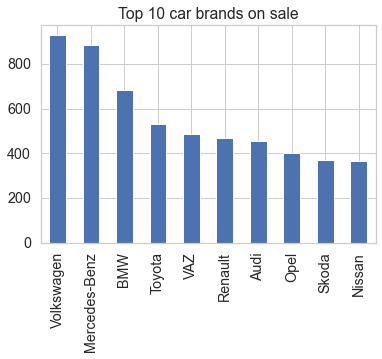

In [23]:
car_sales_data.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on sale")

Above diagram shows <b>Volkswagen</b> and <b>Mercedes Benz</b> are highest selling cars 

<b>5.4 Demonstration of data using Scattered Plot </b>

Text(0.5, 1.0, 'Scatter plot showing the variation of Price over the years')

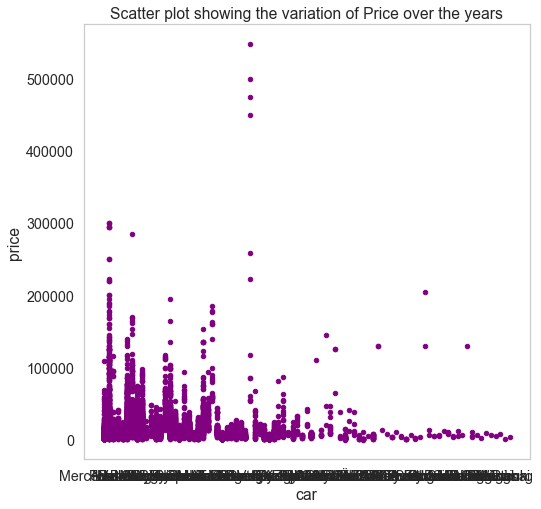

In [32]:
car_sales_data.plot(kind='scatter', x='car', y='price', figsize=(8, 8), color='purple', grid=False)

plt.title('Scatter plot showing the variation of Price over the years')

<b> 5.5 Distribution of data based on the parameters <b>Price,mileage,body </b> using Pairplot </b>

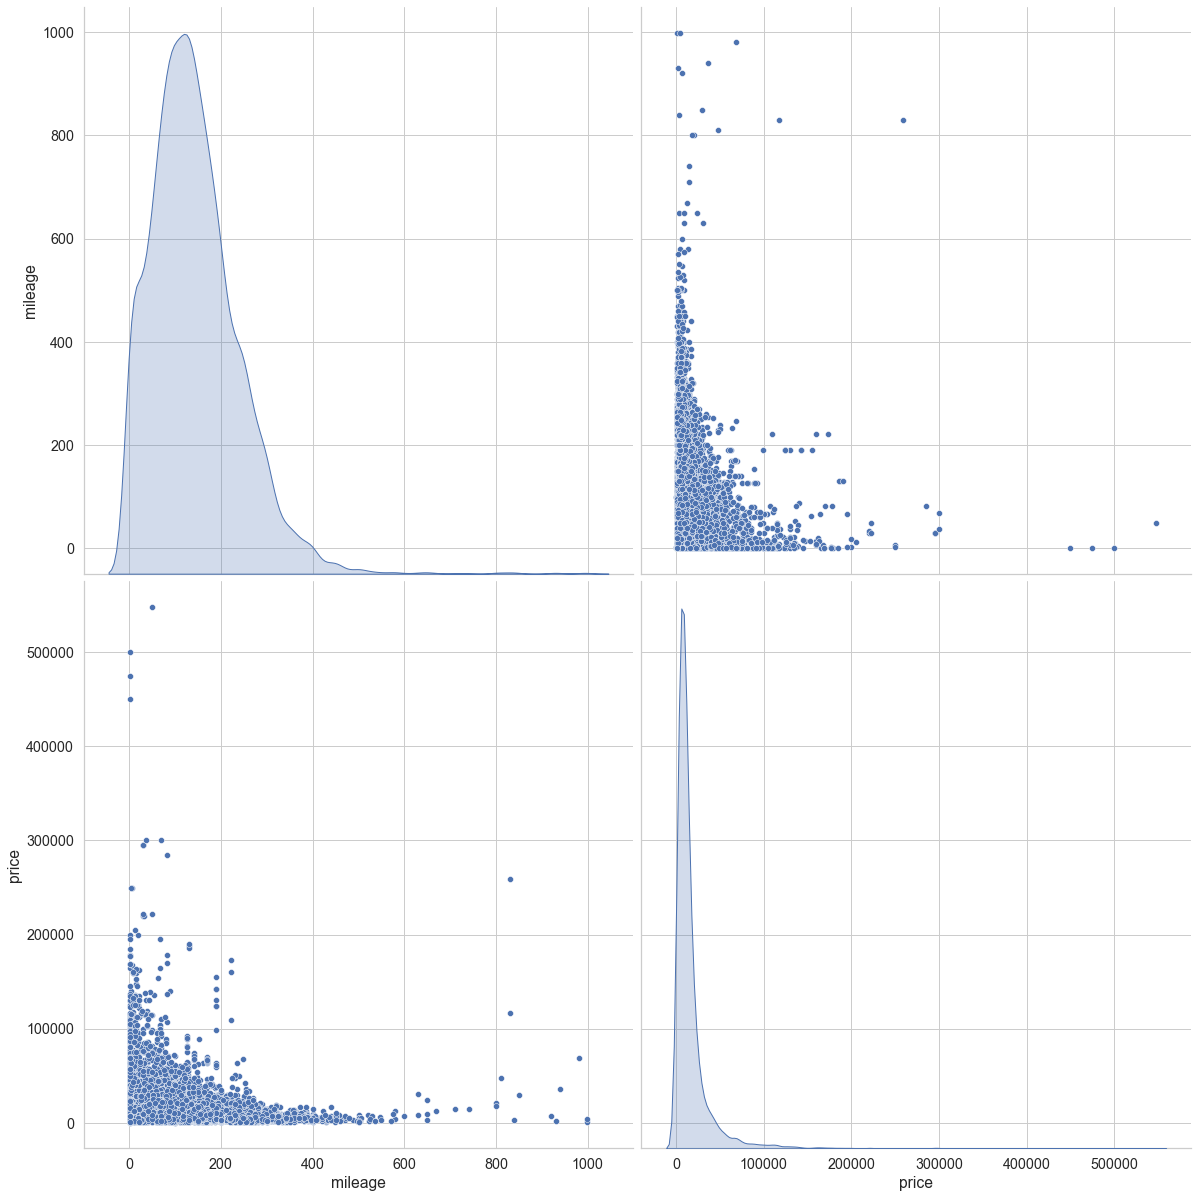

In [32]:
sns.pairplot(data=car_sales_data[['car','model','body','mileage','price']], size=8.5, diag_kind='kde')

<b>4. Average Sales price of Cars<b>

In [37]:
groupby_car = pd.DataFrame(car_sales_data.groupby('car')['price'].sum())
groupby_car.columns=['Average Price']
groupby_car.head(20)

,Average Price
car,
Acura,2.412070e+05
Alfa Romeo,9.944900e+04
Aro,3.600000e+03
Aston Martin,3.150000e+05
Audi,8.317069e+06
BMW,1.592494e+07
BYD,5.679900e+04
Barkas,5.500000e+03
Bentley,2.965074e+06


<AxesSubplot:xlabel='car'>

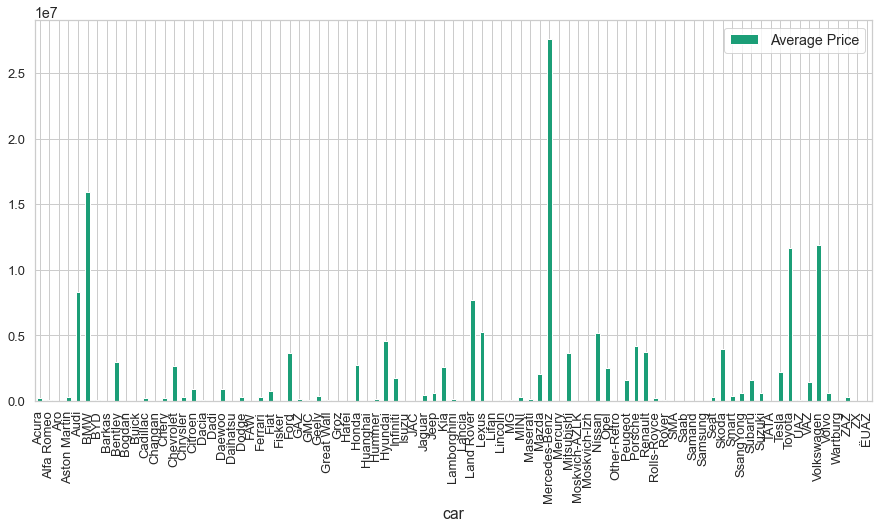

In [52]:
groupby_car.plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)

From the above diagram we see that below 3 cars are most <b>expensive</b>
<ol>
    <li>Mercedes Benz </li>
    <li>BMW</li>
    <li>Toyota and Tesla</li>
</ol>

<b>5. Most Preferred Body Type </b> 

Text(0.5, 1.0, 'Most preferred body type')

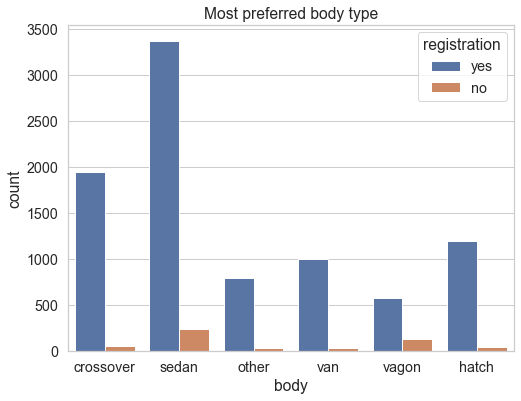

In [51]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(x='body', data=car_sales_data, orient='h', hue='registration')
plt.title("Most preferred body type")

From the above diagram we see <b>registered sedan</b> is the most preferred body type

Text(0.5, 1.0, 'Donut Plot showing the most preferred Engine Type')

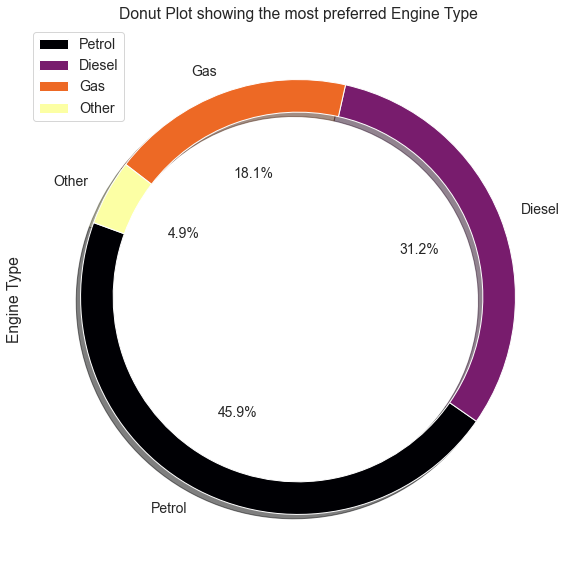

In [43]:
car_sales_data['engType'].value_counts().plot(kind='pie',fontsize=14,autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('Engine Type ')
plt.title('Donut Plot showing the most preferred Engine Type')

Above diagram shows <b> Petrol </b> is most preferred <b> Engine Type </b>

Text(0.5, 1.0, 'year - price lineplot')

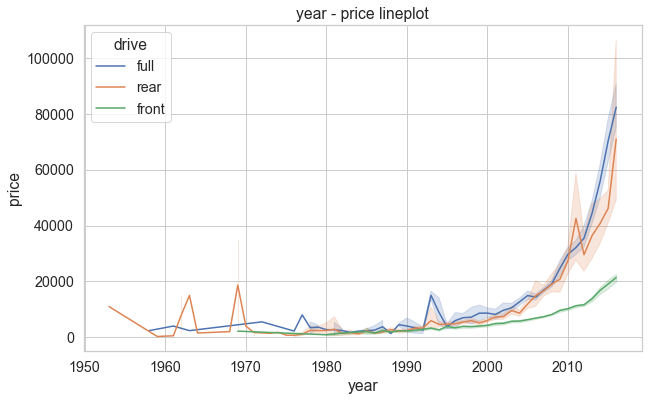

In [50]:
fig,ax =plt.subplots(figsize=(10,6))
sns.lineplot(data=car_sales_data, y='price', x='year', hue='drive')
plt.title("year - price lineplot")

Above figure demonstrates the price distribution over years . In recent years <b>Price</b> has increased  

Text(0.5, 1.0, 'mileage - price lineplot')

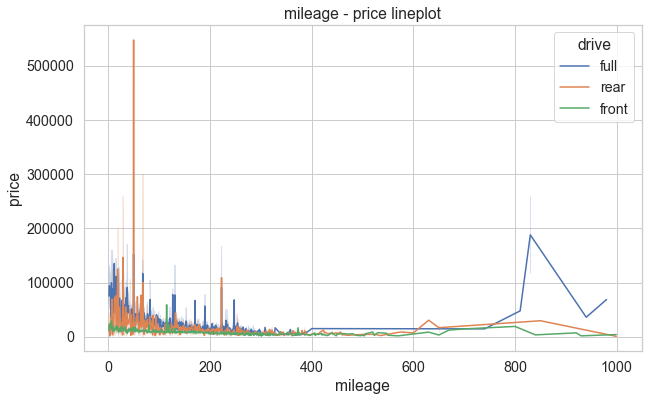

In [47]:
fig,ax =plt.subplots(figsize=(10,6))
sns.lineplot(data=car_sales_data, y='price', x='mileage', hue='drive')
plt.title("mileage - price lineplot")

Above figure shows relation between <b>mileage</b> and <b>Price</b>. Price varies as per the mileage in the above diagram.

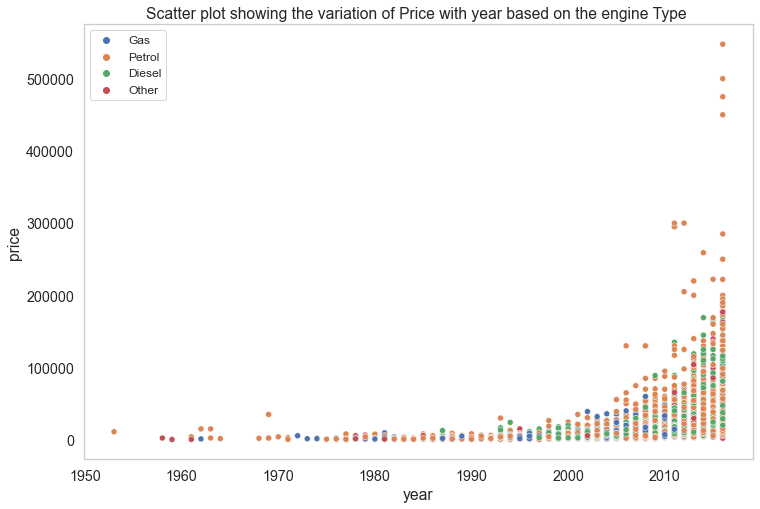

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=car_sales_data, x='year', y='price', hue='engType')

plt.xlabel('year')
plt.ylabel('price')
plt.title('Scatter plot showing the variation of Price with year based on the engine Type ')
plt.grid(False)
plt.legend(fontsize=12)

From the above diagram we see the <b>price</b> of  engine Type= <b>Petrol</b> has increased in recent years

<h1>6. Conclusion </h1>

- With the help of the above dataset i have learn the concept of <b>Exploratory Data Analysis</b>. 
- The above dataset has helped me used Pandas <b>Dataframe</b> and packages like  __matplotlib and seaborn__ <br/>
- I also make use of __pandas profiling__ feature to generate  html report containing all the detail and missing information of the various columns .
- I have seen the impact of column price when it related with other columns  <b>mileage ,Engine type</b> over the **years** 
- The dataset also has helped me the right use of substituting <b>median</b> and <b>mode</b> based on <b>Numerical</b> and <b>categorical</b> data.
- The analysis will further help to choose the right model.